In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Text_Emotion_Classifier/dataset/preprocessed_go_emotions.csv')
emotion_columns = [
    'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring',
    'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval',
    'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief',
    'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization',
    'relief', 'remorse', 'sadness', 'surprise', 'neutral'
]

In [ ]:
emotion_counts = df[emotion_columns].sum().sort_values(ascending=False)
print(emotion_counts)

neutral           55298
approval          17620
admiration        17131
annoyance         13618
gratitude         11625
disapproval       11424
curiosity          9692
amusement          9245
realization        8785
optimism           8715
disappointment     8469
love               8191
anger              8084
joy                7983
confusion          7359
sadness            6758
caring             5999
excitement         5629
surprise           5514
disgust            5301
desire             3817
fear               3197
remorse            2525
embarrassment      2476
nervousness        1810
pride              1302
relief             1289
grief               673
dtype: int64


In [ ]:
df.columns

Index(['example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance',
       'approval', 'caring', 'confusion', 'curiosity', 'desire',
       'disappointment', 'disapproval', 'disgust', 'embarrassment',
       'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love',
       'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse',
       'sadness', 'surprise', 'neutral', 'cleaned_text'],
      dtype='object')

In [ ]:
df.drop(columns=["text"], inplace=True)

In [ ]:
texts = df["cleaned_text"].astype(str).tolist()
labels = df.drop(columns=["cleaned_text", "example_very_unclear"]).to_numpy(dtype="float32")

In [ ]:
MAX_WORDS = 20000
MAX_LEN = 100

tokenizer = Tokenizer(num_words=MAX_WORDS, oov_token="<OOV>")
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_LEN)
y = labels


In [ ]:
X_train, X_val, y_train, y_val = train_test_split(
    X, labels, test_size=0.2, random_state=42
)

In [ ]:
model = Sequential([
    Embedding(MAX_WORDS, 128, input_length=MAX_LEN),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(y.shape[1], activation="sigmoid")  # multi-label
])

model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=10,
    batch_size=64
)


Epoch 1/10
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 37s 11ms/step - accuracy: 0.2924 - loss: 0.1661 - val_accuracy: 0.3846 - val_loss: 0.1292
Epoch 2/10
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.3945 - loss: 0.1269 - val_accuracy: 0.3955 - val_loss: 0.1249
Epoch 3/10
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4180 - loss: 0.1195 - val_accuracy: 0.3955 - val_loss: 0.1238
Epoch 4/10
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4377 - loss: 0.1140 - val_accuracy: 0.3923 - val_loss: 0.1240
Epoch 5/10
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4496 - loss: 0.1107 - val_accuracy: 0.3955 - val_loss: 0.1246
Epoch 6/10
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 29s 11ms/step - accuracy: 0.4605 - loss: 0.1075 - val_accuracy: 0.3943 - val_loss: 0.1258
Epoch 7/10
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4623 - loss: 0.1052 - val_accuracy: 0.3905 - val_loss: 0.1272
Epoch 8/10
2598/2598 ━━━━━━━━━━━━━━━━━━━━ 28s 11ms/step - accuracy: 0.4710 -

In [ ]:
# Save the entire model (architecture + weights + optimizer state)
model.save("/content/drive/MyDrive/Text_Emotion_Classifier/model/LSTM/LSTM_emotion.h5")  # saves in HDF5 format


In [ ]:
MODEL_PATH = "/content/drive/MyDrive/Text_Emotion_Classifier/model/LSTM/LSTM_emotion.h5"

# Load the tokenizer by fitting on the original training texts
print("Loading dataset to fit tokenizer...")
texts = df["cleaned_text"].astype(str).tolist()

Loading dataset to fit tokenizer...


In [ ]:
def predict_emotions(text: str, threshold: float = 0.5):
    """
    Predict emotions for a single preprocessed text.

    Args:
        text (str): Preprocessed input text (similar to 'cleaned_text' in dataset).
        threshold (float): Probability threshold to consider an emotion "present".
                           Common values: 0.3-0.5 (lower = more sensitive).

    Returns:
        dict: Contains detected emotions and full probability breakdown.
    """
    # Convert text to sequence and pad
    sequence = tokenizer.texts_to_sequences([text])
    padded = pad_sequences(sequence, maxlen=MAX_LEN)

    # Predict probabilities
    probs = model.predict(padded, verbose=0)[0]

    # Compile results
    detected = [emotion_columns[i] for i, prob in enumerate(probs) if prob > threshold]
    prob_dict = {emotion: float(probs[i]) for i, emotion in enumerate(emotion_columns)}

    return {
        'detected_emotions': detected,
        'probabilities': prob_dict
    }

In [ ]:
if __name__ == "__main__":
    examples = [
        "this is so amazing i cant believe it",
        "i hate when people do that it makes me angry",
        "im feeling really sad today nothing is going right",
        "wow thats surprising and exciting",
        "thanks a lot i really appreciate your help"
    ]

    print("\n" + "="*60)
    print("EMOTION INFERENCE EXAMPLES")
    print("="*60)

    for text in examples:
        result = predict_emotions(text, threshold=0.4)

        print(f"\nText: {text}")
        print(f"Detected emotions: {', '.join(result['detected_emotions']) or 'none above threshold'}")

        # Optional: print top 5 probabilities
        top5 = sorted(result['probabilities'].items(), key=lambda x: -x[1])[:5]
        print("Top probabilities:")
        for emo, prob in top5:
            print(f"  {emo}: {prob:.4f}")


EMOTION INFERENCE EXAMPLES

Text: this is so amazing i cant believe it
Detected emotions: admiration
Top probabilities:
  admiration: 0.8779
  neutral: 0.0626
  surprise: 0.0610
  approval: 0.0233
  excitement: 0.0224

Text: i hate when people do that it makes me angry
Detected emotions: anger
Top probabilities:
  anger: 0.8538
  neutral: 0.3724
  annoyance: 0.0335
  disapproval: 0.0159
  curiosity: 0.0140

Text: im feeling really sad today nothing is going right
Detected emotions: neutral
Top probabilities:
  neutral: 0.5472
  sadness: 0.1498
  anger: 0.0654
  disappointment: 0.0456
  annoyance: 0.0195

Text: wow thats surprising and exciting
Detected emotions: excitement, surprise
Top probabilities:
  excitement: 0.7095
  surprise: 0.4625
  admiration: 0.0666
  curiosity: 0.0552
  joy: 0.0409

Text: thanks a lot i really appreciate your help
Detected emotions: admiration, gratitude
Top probabilities:
  gratitude: 0.9610
  admiration: 0.5255
  approval: 0.1316
  joy: 0.0605
  love: 0

## Evaluating the Model

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import numpy as np

In [ ]:
model = load_model(MODEL_PATH)
print("Model loaded.")

Model loaded.


In [ ]:
# Settings (must match training)
MAX_LEN = 100

# Prepare full data
texts = df["cleaned_text"].astype(str).tolist()
sequences = tokenizer.texts_to_sequences(texts)
X = pad_sequences(sequences, maxlen=MAX_LEN)

In [ ]:
# True labels (multi-label: 0 or 1 for each emotion)
y_true = df[emotion_columns].values

In [ ]:
# Predict probabilities
print("Predicting on entire dataset...")
y_prob = model.predict(X, verbose=1)

Predicting on entire dataset...
6495/6495 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step


In [ ]:
# Convert probabilities to binary predictions (threshold = 0.5)
y_pred = (y_prob > 0.5).astype(int)

### Multi Label Evaluation Results

In [ ]:
# 1. Exact Match Accuracy (all labels must match perfectly)
exact_accuracy = accuracy_score(y_true, y_pred)
print(f"Exact Match Accuracy: {exact_accuracy:.4f}")

Exact Match Accuracy: 0.2566


In [ ]:
# Per-emotion Precision, Recall, F1
print("\nPer-Emotion Classification Report:")
print(classification_report(y_true, y_pred, target_names=emotion_columns, zero_division=0))


Per-Emotion Classification Report:
                precision    recall  f1-score   support

    admiration       0.71      0.48      0.57     17131
     amusement       0.68      0.55      0.61      9245
         anger       0.66      0.23      0.34      8084
     annoyance       0.62      0.07      0.13     13618
      approval       0.66      0.09      0.16     17620
        caring       0.68      0.08      0.14      5999
     confusion       0.70      0.11      0.18      7359
     curiosity       0.73      0.14      0.23      9692
        desire       0.64      0.17      0.27      3817
disappointment       0.72      0.05      0.09      8469
   disapproval       0.65      0.10      0.17     11424
       disgust       0.72      0.14      0.24      5301
 embarrassment       0.75      0.12      0.20      2476
    excitement       0.72      0.11      0.19      5629
          fear       0.69      0.37      0.48      3197
     gratitude       0.90      0.76      0.83     11625
         gr

In [ ]:
# Show average scores
from sklearn.metrics import precision_recall_fscore_support
precision, recall, f1, support = precision_recall_fscore_support(y_true, y_pred, average='micro', zero_division=0)

print(f"\nMicro-averaged Scores:")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")


Micro-averaged Scores:
  Precision: 0.7184
  Recall:    0.2738
  F1-Score:  0.3965


## Hyperparameter Tuning

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import precision_recall_fscore_support
from itertools import product

In [ ]:
# Hyperparameters to tune
embedding_dims = [128, 256]          # try bigger embeddings
lstm_units = [128, 256]              # more capacity
dropout_rates = [0.3, 0.5]           # regularization
bidirectional = [True, False]

In [ ]:
# To keep it fast: test 8 combinations
configs = list(product(embedding_dims, lstm_units, dropout_rates, bidirectional))
print(f"Testing {len(configs)} configurations...\n")

Testing 16 configurations...



In [ ]:
best_f1 = 0
best_config = None
best_threshold = 0.5

In [ ]:

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [ ]:
num_emotions = len(emotion_columns)

for i, (emb_dim, units, dropout, bi) in enumerate(configs, 1):
    print(f"[{i}/{len(configs)}] Testing: emb={emb_dim}, lstm_units={units}, dropout={dropout}, bidirectional={bi}")

    model = Sequential()
    model.add(Embedding(MAX_WORDS, emb_dim, input_length=MAX_LEN))

    if bi:
        model.add(Bidirectional(LSTM(units, return_sequences=False)))
    else:
        model.add(LSTM(units, return_sequences=False))

    model.add(Dropout(dropout))
    model.add(Dense(num_emotions, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    # Train quickly
    model.fit(
        X_train, y_train,
        validation_data=(X_val, y_val),
        epochs=10,              # early stopping will prevent overfitting
        batch_size=256,
        callbacks=[early_stopping],
        verbose=1
    )

    # Predict probabilities on validation
    y_prob = model.predict(X_val, verbose=0)

    # Find best threshold for this model
    local_best_f1 = 0
    local_best_thresh = 0.5
    for thresh in np.arange(0.2, 0.6, 0.05):
        y_pred = (y_prob > thresh).astype(int)
        _, _, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='micro', zero_division=0)
        if f1 > local_best_f1:
            local_best_f1 = f1
            local_best_thresh = thresh

    print(f"  -> Best Micro F1: {local_best_f1:.4f} (at threshold {local_best_thresh:.2f})\n")

    if local_best_f1 > best_f1:
        best_f1 = local_best_f1
        best_threshold = local_best_thresh
        best_config = (emb_dim, units, dropout, bi)
        best_model = model  # save the best one

[1/16] Testing: emb=128, lstm_units=128, dropout=0.3, bidirectional=True
Epoch 1/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 22s 31ms/step - accuracy: 0.2571 - loss: 0.1849 - val_accuracy: 0.3702 - val_loss: 0.1340
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.3806 - loss: 0.1320 - val_accuracy: 0.3886 - val_loss: 0.1272
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.4061 - loss: 0.1234 - val_accuracy: 0.3931 - val_loss: 0.1250
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4229 - loss: 0.1186 - val_accuracy: 0.3948 - val_loss: 0.1241
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 19s 30ms/step - accuracy: 0.4333 - loss: 0.1148 - val_accuracy: 0.3937 - val_loss: 0.1242
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4459 - loss: 0.1116 - val_accuracy: 0.3951 - val_loss: 0.1245
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.4538 - loss: 0.1089 - val_accuracy: 0.3928 - val_loss: 0.1253
  -> Best Micro F

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.2405 - loss: 0.2006 - val_accuracy: 0.3570 - val_loss: 0.1392
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.3661 - loss: 0.1373 - val_accuracy: 0.3822 - val_loss: 0.1307
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3940 - loss: 0.1279 - val_accuracy: 0.3876 - val_loss: 0.1276
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4142 - loss: 0.1213 - val_accuracy: 0.3909 - val_loss: 0.1259
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4289 - loss: 0.1174 - val_accuracy: 0.3903 - val_loss: 0.1256
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4399 - loss: 0.1137 - val_accuracy: 0.3906 - val_loss: 0.1255
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4484 - loss: 0.1111 - val_accuracy: 0.3882 - val_loss: 0.1259
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.4568 - loss: 0.1088 - val_accurac

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 23s 31ms/step - accuracy: 0.2405 - loss: 0.1904 - val_accuracy: 0.3590 - val_loss: 0.1366
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.3684 - loss: 0.1361 - val_accuracy: 0.3826 - val_loss: 0.1288
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.3944 - loss: 0.1270 - val_accuracy: 0.3906 - val_loss: 0.1263
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.4126 - loss: 0.1224 - val_accuracy: 0.3962 - val_loss: 0.1251
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4241 - loss: 0.1186 - val_accuracy: 0.3957 - val_loss: 0.1249
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4347 - loss: 0.1155 - val_accuracy: 0.3923 - val_loss: 0.1248
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4450 - loss: 0.1130 - val_accuracy: 0.3960 - val_loss: 0.1248
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 31ms/step - accuracy: 0.4498 - loss: 0.1114 - val_accurac

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 13s 18ms/step - accuracy: 0.2194 - loss: 0.2062 - val_accuracy: 0.3579 - val_loss: 0.1391
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.3618 - loss: 0.1394 - val_accuracy: 0.3762 - val_loss: 0.1308
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.3898 - loss: 0.1299 - val_accuracy: 0.3890 - val_loss: 0.1273
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 13s 20ms/step - accuracy: 0.4082 - loss: 0.1245 - val_accuracy: 0.3950 - val_loss: 0.1258
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4194 - loss: 0.1205 - val_accuracy: 0.3942 - val_loss: 0.1255
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 18ms/step - accuracy: 0.4281 - loss: 0.1180 - val_accuracy: 0.3921 - val_loss: 0.1256
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4372 - loss: 0.1151 - val_accuracy: 0.3926 - val_loss: 0.1255
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 11s 18ms/step - accuracy: 0.4430 - loss: 0.1128 - val_accurac

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 42s 61ms/step - accuracy: 0.2681 - loss: 0.1763 - val_accuracy: 0.3662 - val_loss: 0.1346
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.3797 - loss: 0.1309 - val_accuracy: 0.3871 - val_loss: 0.1268
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.4064 - loss: 0.1223 - val_accuracy: 0.3947 - val_loss: 0.1246
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.4256 - loss: 0.1169 - val_accuracy: 0.3963 - val_loss: 0.1240
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 39s 61ms/step - accuracy: 0.4353 - loss: 0.1134 - val_accuracy: 0.3954 - val_loss: 0.1240
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.4493 - loss: 0.1100 - val_accuracy: 0.3909 - val_loss: 0.1242
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.4583 - loss: 0.1074 - val_accuracy: 0.3897 - val_loss: 0.1252
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.4613 - loss: 0.1053 - val_accurac

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 23s 32ms/step - accuracy: 0.2571 - loss: 0.1844 - val_accuracy: 0.3644 - val_loss: 0.1368
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.3754 - loss: 0.1335 - val_accuracy: 0.3850 - val_loss: 0.1279
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4027 - loss: 0.1239 - val_accuracy: 0.3916 - val_loss: 0.1257
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4223 - loss: 0.1180 - val_accuracy: 0.3962 - val_loss: 0.1244
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4353 - loss: 0.1142 - val_accuracy: 0.3926 - val_loss: 0.1246
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4483 - loss: 0.1107 - val_accuracy: 0.3913 - val_loss: 0.1247
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4568 - loss: 0.1079 - val_accuracy: 0.3890 - val_loss: 0.1255
  -> Best Micro F1: 0.4158 (at threshold 0.20)

[7/16] Testing: emb=128, lstm_units=256, dropout=0.5,

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 42s 62ms/step - accuracy: 0.2671 - loss: 0.1797 - val_accuracy: 0.3660 - val_loss: 0.1344
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.3769 - loss: 0.1324 - val_accuracy: 0.3849 - val_loss: 0.1280
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.4025 - loss: 0.1237 - val_accuracy: 0.3933 - val_loss: 0.1249
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.4210 - loss: 0.1187 - val_accuracy: 0.3970 - val_loss: 0.1242
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.4366 - loss: 0.1148 - val_accuracy: 0.3961 - val_loss: 0.1239
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 40s 61ms/step - accuracy: 0.4422 - loss: 0.1117 - val_accuracy: 0.3938 - val_loss: 0.1239
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.4541 - loss: 0.1089 - val_accuracy: 0.3901 - val_loss: 0.1248
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 39s 60ms/step - accuracy: 0.4597 - loss: 0.1065 - val_accurac

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.2427 - loss: 0.1875 - val_accuracy: 0.3618 - val_loss: 0.1367
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.3725 - loss: 0.1349 - val_accuracy: 0.3832 - val_loss: 0.1284
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.3962 - loss: 0.1257 - val_accuracy: 0.3903 - val_loss: 0.1259
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 33ms/step - accuracy: 0.4172 - loss: 0.1203 - val_accuracy: 0.3975 - val_loss: 0.1249
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4279 - loss: 0.1163 - val_accuracy: 0.3937 - val_loss: 0.1245
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4419 - loss: 0.1133 - val_accuracy: 0.3938 - val_loss: 0.1250
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4510 - loss: 0.1105 - val_accuracy: 0.3913 - val_loss: 0.1255
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.4560 - loss: 0.1080 - val_accurac

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 29s 40ms/step - accuracy: 0.2642 - loss: 0.1832 - val_accuracy: 0.3721 - val_loss: 0.1327
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.3849 - loss: 0.1306 - val_accuracy: 0.3921 - val_loss: 0.1262
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4122 - loss: 0.1219 - val_accuracy: 0.3956 - val_loss: 0.1248
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4290 - loss: 0.1170 - val_accuracy: 0.3973 - val_loss: 0.1239
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4414 - loss: 0.1129 - val_accuracy: 0.3948 - val_loss: 0.1244
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4560 - loss: 0.1093 - val_accuracy: 0.3938 - val_loss: 0.1249
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.4607 - loss: 0.1068 - val_accuracy: 0.3889 - val_loss: 0.1259
  -> Best Micro F1: 0.4163 (at threshold 0.20)

[10/16] Testing: emb=256, lstm_units=128, dropout=0.3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 17s 24ms/step - accuracy: 0.2480 - loss: 0.1931 - val_accuracy: 0.3655 - val_loss: 0.1366
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3763 - loss: 0.1346 - val_accuracy: 0.3882 - val_loss: 0.1288
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4063 - loss: 0.1245 - val_accuracy: 0.3925 - val_loss: 0.1259
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4239 - loss: 0.1184 - val_accuracy: 0.3962 - val_loss: 0.1247
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4385 - loss: 0.1142 - val_accuracy: 0.3946 - val_loss: 0.1249
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4520 - loss: 0.1104 - val_accuracy: 0.3908 - val_loss: 0.1255
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.4580 - loss: 0.1078 - val_accuracy: 0.3930 - val_loss: 0.1263
  -> Best Micro F1: 0.4129 (at threshold 0.20)

[11/16] Testing: emb=256, lstm_units=128, dropout=0.5

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 30s 41ms/step - accuracy: 0.2534 - loss: 0.1847 - val_accuracy: 0.3715 - val_loss: 0.1330
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.3796 - loss: 0.1324 - val_accuracy: 0.3873 - val_loss: 0.1269
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4028 - loss: 0.1244 - val_accuracy: 0.3943 - val_loss: 0.1246
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4200 - loss: 0.1196 - val_accuracy: 0.3981 - val_loss: 0.1240
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4347 - loss: 0.1159 - val_accuracy: 0.3989 - val_loss: 0.1240
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4453 - loss: 0.1126 - val_accuracy: 0.3968 - val_loss: 0.1247
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 40ms/step - accuracy: 0.4508 - loss: 0.1101 - val_accuracy: 0.3964 - val_loss: 0.1249
  -> Best Micro F1: 0.4161 (at threshold 0.20)

[12/16] Testing: emb=256, lstm_units=128, dropout=0.5

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 17s 23ms/step - accuracy: 0.2225 - loss: 0.2013 - val_accuracy: 0.3630 - val_loss: 0.1366
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3717 - loss: 0.1368 - val_accuracy: 0.3869 - val_loss: 0.1284
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.3978 - loss: 0.1274 - val_accuracy: 0.3922 - val_loss: 0.1259
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 22ms/step - accuracy: 0.4130 - loss: 0.1223 - val_accuracy: 0.3950 - val_loss: 0.1249
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.4272 - loss: 0.1178 - val_accuracy: 0.3963 - val_loss: 0.1244
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4408 - loss: 0.1146 - val_accuracy: 0.3946 - val_loss: 0.1251
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4459 - loss: 0.1125 - val_accuracy: 0.3921 - val_loss: 0.1255
Epoch 8/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 15s 23ms/step - accuracy: 0.4532 - loss: 0.1100 - val_accurac

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - accuracy: 0.2787 - loss: 0.1728 - val_accuracy: 0.3740 - val_loss: 0.1312
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.3899 - loss: 0.1280 - val_accuracy: 0.3980 - val_loss: 0.1249
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.4170 - loss: 0.1195 - val_accuracy: 0.3998 - val_loss: 0.1237
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.4373 - loss: 0.1140 - val_accuracy: 0.3962 - val_loss: 0.1234
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.4484 - loss: 0.1098 - val_accuracy: 0.3930 - val_loss: 0.1238
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 50s 76ms/step - accuracy: 0.4604 - loss: 0.1061 - val_accuracy: 0.3890 - val_loss: 0.1249
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.4676 - loss: 0.1033 - val_accuracy: 0.3893 - val_loss: 0.1263
  -> Best Micro F1: 0.4197 (at threshold 0.20)

[14/16] Testing: emb=256, lstm_units=256, dropout=0.3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 27s 39ms/step - accuracy: 0.2649 - loss: 0.1825 - val_accuracy: 0.3724 - val_loss: 0.1326
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.3848 - loss: 0.1298 - val_accuracy: 0.3870 - val_loss: 0.1263
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4140 - loss: 0.1203 - val_accuracy: 0.3951 - val_loss: 0.1242
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.4337 - loss: 0.1145 - val_accuracy: 0.3984 - val_loss: 0.1238
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4491 - loss: 0.1103 - val_accuracy: 0.3914 - val_loss: 0.1246
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.4608 - loss: 0.1068 - val_accuracy: 0.3893 - val_loss: 0.1261
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4636 - loss: 0.1042 - val_accuracy: 0.3867 - val_loss: 0.1267
  -> Best Micro F1: 0.4175 (at threshold 0.20)

[15/16] Testing: emb=256, lstm_units=256, dropout=0.5

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 51s 74ms/step - accuracy: 0.2701 - loss: 0.1757 - val_accuracy: 0.3749 - val_loss: 0.1312
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.3852 - loss: 0.1296 - val_accuracy: 0.3947 - val_loss: 0.1254
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.4143 - loss: 0.1210 - val_accuracy: 0.4011 - val_loss: 0.1235
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.4314 - loss: 0.1160 - val_accuracy: 0.4000 - val_loss: 0.1233
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.4425 - loss: 0.1123 - val_accuracy: 0.3975 - val_loss: 0.1237
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.4513 - loss: 0.1091 - val_accuracy: 0.3949 - val_loss: 0.1250
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 48s 74ms/step - accuracy: 0.4630 - loss: 0.1058 - val_accuracy: 0.3943 - val_loss: 0.1259
  -> Best Micro F1: 0.4188 (at threshold 0.20)

[16/16] Testing: emb=256, lstm_units=256, dropout=0.5

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


650/650 ━━━━━━━━━━━━━━━━━━━━ 27s 40ms/step - accuracy: 0.2478 - loss: 0.1866 - val_accuracy: 0.3726 - val_loss: 0.1335
Epoch 2/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 26s 39ms/step - accuracy: 0.3833 - loss: 0.1319 - val_accuracy: 0.3917 - val_loss: 0.1265
Epoch 3/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4076 - loss: 0.1231 - val_accuracy: 0.3984 - val_loss: 0.1242
Epoch 4/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4250 - loss: 0.1175 - val_accuracy: 0.3980 - val_loss: 0.1239
Epoch 5/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4412 - loss: 0.1132 - val_accuracy: 0.3962 - val_loss: 0.1241
Epoch 6/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4519 - loss: 0.1097 - val_accuracy: 0.3930 - val_loss: 0.1248
Epoch 7/10
650/650 ━━━━━━━━━━━━━━━━━━━━ 25s 39ms/step - accuracy: 0.4599 - loss: 0.1068 - val_accuracy: 0.3945 - val_loss: 0.1259
  -> Best Micro F1: 0.4171 (at threshold 0.20)



In [ ]:
best_model.save("/content/drive/MyDrive/Text_Emotion_Classifier/model/LSTM/tuned_LSTM_emotion.h5")

In [ ]:
best_config

(128, 128, 0.3, True)

In [ ]:
from datetime import datetime

# Create a unique filename with timestamp and performance
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
model_filename = f"best_lstm_bidirect-{best_config[3]}_emb{best_config[0]}_units{best_config[1]}_drop{best_config[2]}_f1{best_f1:.4f}_thresh{best_threshold:.2f}_{timestamp}.h5"
tokenizer_filename = f"tokenizer_{timestamp}.pkl"

In [ ]:
import joblib
import os

save_dir = "/content/drive/MyDrive/Text_Emotion_Classifier/model/LSTM"
tokenizer_filename = "tokenizer.pkl"  # or add timestamp if you want multiple versions
tokenizer_path = os.path.join(save_dir, tokenizer_filename)

# Save the tokenizer
joblib.dump(tokenizer, tokenizer_path)
print(f"Tokenizer successfully saved to: {tokenizer_path}")

Tokenizer successfully saved to: /content/drive/MyDrive/Text_Emotion_Classifier/model/LSTM/tokenizer.pkl


In [ ]:
from sklearn.metrics import hamming_loss, accuracy_score

# Predict probabilities
y_prob = best_model.predict(X_val, verbose=0)

threshold = 0.30
y_pred = (y_prob > threshold).astype(int)

# Quick evaluation
p, r, f1, _ = precision_recall_fscore_support(y_val, y_pred, average='micro', zero_division=0)

print("Quick Evaluation")
print(f"Threshold:       {threshold}")
print(f"Micro Precision: {p:.4f}")
print(f"Micro Recall:    {r:.4f}")
print(f"Micro F1-Score:  {f1:.4f}")
print(f"Hamming Loss:    {hamming_loss(y_val, y_pred):.4f}")
print(f"Exact Match Acc: {accuracy_score(y_val, y_pred):.4f}")

Quick Evaluation
Threshold:       0.3
Micro Precision: 0.4936
Micro Recall:    0.3304
Micro F1-Score:  0.3959
Hamming Loss:    0.0434
Exact Match Acc: 0.2982


In [ ]:
from sklearn.metrics import precision_recall_fscore_support

y_true = y_val                    # validation ground truth
y_pred = (model.predict(X_val, verbose=0) > 0.3).astype(int)  # the predictions

# Now shapes match → this will work
precision, recall, f1, _ = precision_recall_fscore_support(y_true, y_pred, average='micro', zero_division=0)

print("\nMicro-Averaged Scores (Validation Set):")
print(f"  Precision: {precision:.4f}")
print(f"  Recall:    {recall:.4f}")
print(f"  F1-Score:  {f1:.4f}")


Micro-Averaged Scores (Validation Set):
  Precision: 0.4835
  Recall:    0.3352
  F1-Score:  0.3959


In [ ]:
# Per-emotion Precision, Recall, F1
print("\nPer-Emotion Classification Report:")
print(classification_report(y_true, y_pred, target_names=emotion_columns, zero_division=0))


Per-Emotion Classification Report:
                precision    recall  f1-score   support

    admiration       0.52      0.53      0.52      3429
     amusement       0.56      0.70      0.62      1785
         anger       0.43      0.30      0.35      1681
     annoyance       0.30      0.09      0.14      2767
      approval       0.41      0.06      0.11      3552
        caring       0.37      0.10      0.15      1189
     confusion       0.44      0.07      0.12      1494
     curiosity       0.41      0.09      0.15      1972
        desire       0.48      0.14      0.21       808
disappointment       0.67      0.01      0.03      1656
   disapproval       0.30      0.01      0.03      2323
       disgust       0.58      0.12      0.19      1095
 embarrassment       0.76      0.04      0.07       521
    excitement       0.37      0.08      0.13      1137
          fear       0.41      0.41      0.41       625
     gratitude       0.84      0.77      0.80      2323
         gr

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

from sklearn.metrics import precision_recall_fscore_support

In [ ]:
num_emotions = len(emotion_columns)

# Your best hyperparameters
emb_dim = 128
units = 128
dropout_rate = 0.3
bidirectional = True

# Build the model
model = Sequential()
model.add(Embedding(input_dim=MAX_WORDS,      # your vocab size
                    output_dim=emb_dim,
                    input_length=MAX_LEN))    # your max sequence length

if bidirectional:
    model.add(Bidirectional(LSTM(units=units, return_sequences=False)))
else:
    model.add(LSTM(units=units, return_sequences=False))

model.add(Dropout(dropout_rate))
model.add(Dense(num_emotions, activation='sigmoid'))

# Compile with a slightly lower learning rate for better convergence over 20 epochs
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0005),  # reduced from default ~0.001
    metrics=['accuracy']
)

model.summary()  # optional: check the architecture

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True,
    verbose=1
)

checkpoint = ModelCheckpoint(
    'best_lstm_model.keras',
    monitor='val_loss',
    save_best_only=True,
    verbose=1
)

In [ ]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=256,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/20
649/650 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.2297 - loss: 0.2031
Epoch 1: val_loss improved from inf to 0.13957, saving model to best_lstm_model.keras
650/650 ━━━━━━━━━━━━━━━━━━━━ 29s 31ms/step - accuracy: 0.2299 - loss: 0.2030 - val_accuracy: 0.3549 - val_loss: 0.1396
Epoch 2/20
649/650 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3617 - loss: 0.1380
Epoch 2: val_loss improved from 0.13957 to 0.13069, saving model to best_lstm_model.keras
650/650 ━━━━━━━━━━━━━━━━━━━━ 20s 30ms/step - accuracy: 0.3618 - loss: 0.1380 - val_accuracy: 0.3802 - val_loss: 0.1307
Epoch 3/20
648/650 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.3896 - loss: 0.1285
Epoch 3: val_loss improved from 0.13069 to 0.12770, saving model to best_lstm_model.keras
650/650 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.3896 - loss: 0.1285 - val_accuracy: 0.3872 - val_loss: 0.1277
Epoch 4/20
649/650 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4056 - loss: 0.1234
Epoch 4: val_loss improved fr

In [ ]:
model.save("/content/drive/MyDrive/Text_Emotion_Classifier/model/LSTM/best_LSTM_emotion.keras")

In [ ]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 100, 128)       │     2,560,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ (None, 256)            │       263,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 28)             │         7,196 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,491,094 (32.39 MB)

 Trainable params: 2,830,364 (10.80 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 5,660,730 (21.59 MB)

## Final Evaluation for Results

In [ ]:
from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report
import numpy as np

# Load the best model
model = load_model('best_lstm_model.keras')

# Get probabilities
y_prob = model.predict(X_val, verbose=0)

# Find best threshold
best_thresh = 0.3
best_f1 = 0
for thresh in np.arange(0.1, 0.8, 0.01):
    y_pred_temp = (y_prob > thresh).astype(int)
    f1 = classification_report(y_val, y_pred_temp, output_dict=True, zero_division=0)['micro avg']['f1-score']
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

# Final predictions with best threshold
y_pred = (y_prob > best_thresh).astype(int)

# Simple per-emotion + overall report (exactly like you wanted)
print(f"Best threshold: {best_thresh:.2f} | Micro F1: {best_f1:.4f}\n")

print("Per-Emotion Classification Report:")
print(classification_report(y_val, y_pred, target_names=emotion_columns, zero_division=0))

Best threshold: 0.20 | Micro F1: 0.4154

Per-Emotion Classification Report:
                precision    recall  f1-score   support

    admiration       0.46      0.63      0.53      3429
     amusement       0.51      0.77      0.61      1785
         anger       0.30      0.47      0.37      1681
     annoyance       0.24      0.28      0.26      2767
      approval       0.26      0.19      0.22      3552
        caring       0.29      0.21      0.24      1189
     confusion       0.27      0.22      0.24      1494
     curiosity       0.29      0.20      0.23      1972
        desire       0.44      0.23      0.30       808
disappointment       0.24      0.12      0.16      1656
   disapproval       0.24      0.22      0.23      2323
       disgust       0.27      0.28      0.28      1095
 embarrassment       0.52      0.12      0.20       521
    excitement       0.30      0.18      0.23      1137
          fear       0.41      0.45      0.43       625
     gratitude       0.77  

Done on 27th December 2025

In [ ]:
from tensorflow.keras.models import load_model
import joblib
import os


# Paths
save_dir = "/content/drive/MyDrive/Text_Emotion_Classifier/model/LSTM"
model_path = os.path.join(save_dir, "best_LSTM_emotion.keras")
tokenizer_path = os.path.join(save_dir, "tokenizer.pkl")

# Load the trained model
model = load_model(model_path)
print("Model successfully loaded.")

# Load the tokenizer
tokenizer = joblib.load(tokenizer_path)
print("Tokenizer successfully loaded.")


Model successfully loaded.
Tokenizer successfully loaded.


In [ ]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# If X_val contains raw text
if isinstance(X_val[0], str):
    X_val_seq = tokenizer.texts_to_sequences(X_val.tolist())
    X_val_pad = pad_sequences(
        X_val_seq,
        maxlen=max_len,
        padding="post",
        truncating="post"
    )
else:
    # Already tokenized & padded
    X_val_pad = X_val


In [ ]:
# Predict class probabilities
y_val_probs = model.predict(X_val_pad)

# Convert probabilities to predicted class indices
y_val_pred = np.argmax(y_val_probs, axis=1)


1299/1299 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step


In [ ]:
# Convert one-hot labels to class indices
if len(y_val.shape) > 1:
    y_val_true = np.argmax(y_val, axis=1)
else:
    y_val_true = y_val


In [ ]:
# y_true and y_pred are already binary (0/1)
cm = multilabel_confusion_matrix(y_val_true, y_val_pred)

# Extracting the True Positives (TP) and False Negatives (FN) per class
tp = cm[:, 1, 1]
fn = cm[:, 1, 0]
fp = cm[:, 0, 1]
tn = cm[:, 0, 0]

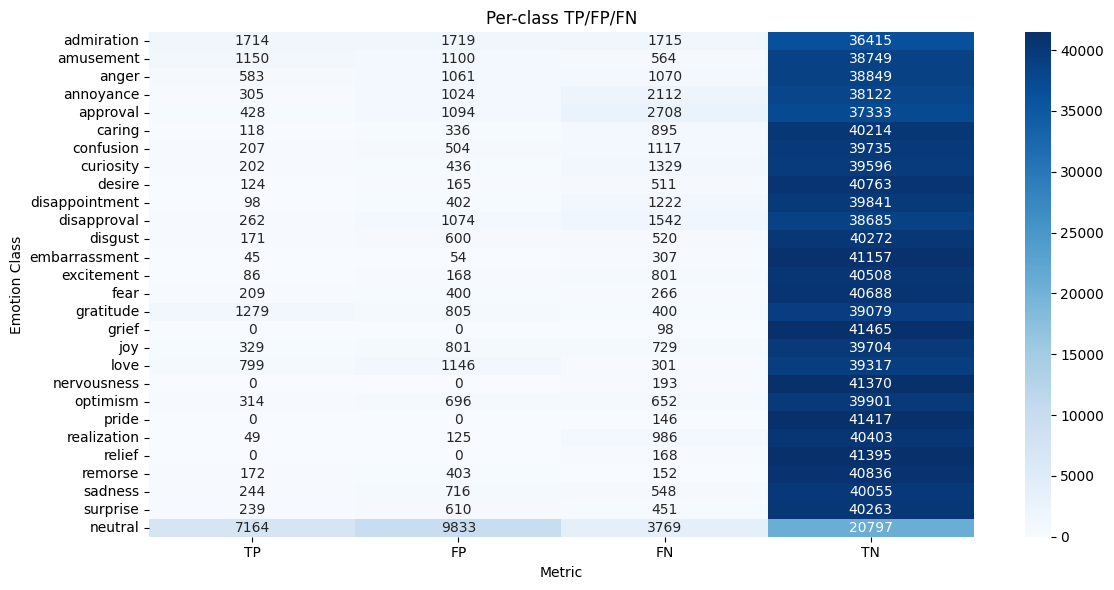

In [ ]:
plt.figure(figsize=(12, 6))
sns.heatmap(
    np.array([tp, fp, fn, tn]).T,
    annot=True,
    fmt='d',
    xticklabels=["TP", "FP", "FN", "TN"],
    yticklabels=emotion_columns,
    cmap="Blues"
)
plt.xlabel("Metric")
plt.ylabel("Emotion Class")
plt.title("Per-class TP/FP/FN")
plt.tight_layout()
plt.show()

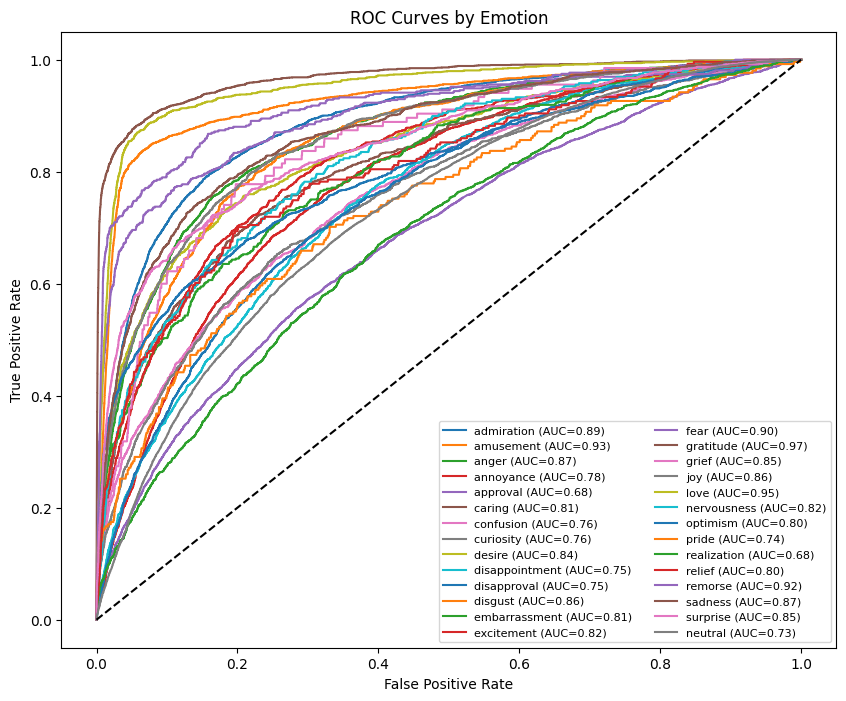

In [ ]:
from sklearn.metrics import roc_curve, auc

num_classes = len(emotion_columns)

plt.figure(figsize=(10, 8))

for i, emotion in enumerate(emotion_columns):
    fpr, tpr, _ = roc_curve(y_val[:, i], y_val_probs[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"{emotion} (AUC={roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves by Emotion")
plt.legend(fontsize=8, ncol=2)
plt.show()


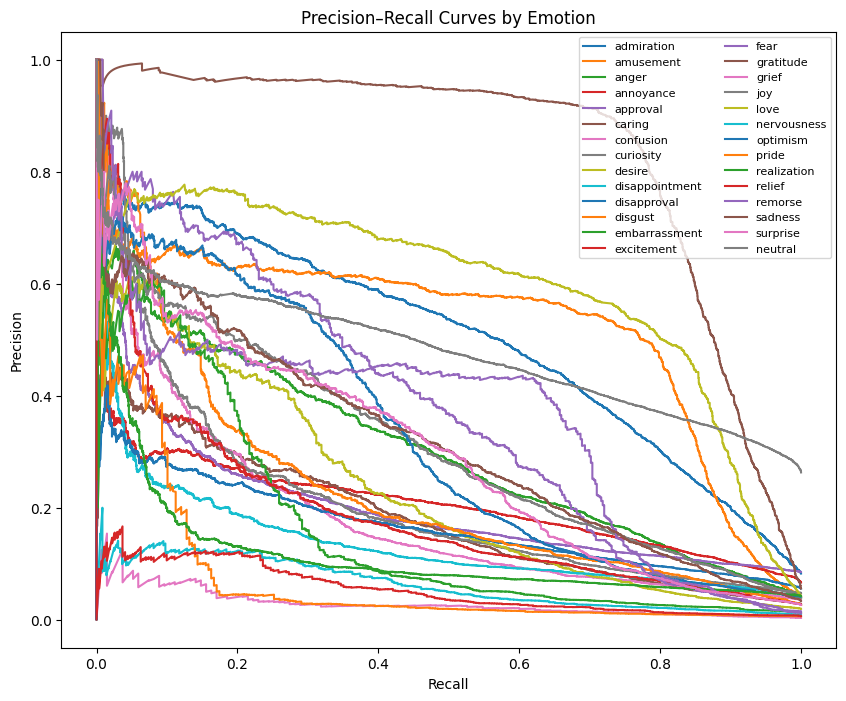

In [ ]:
from sklearn.metrics import precision_recall_curve

plt.figure(figsize=(10, 8))

for i, emotion in enumerate(emotion_columns):
    precision, recall, _ = precision_recall_curve(
        y_val[:, i],
        y_val_probs[:, i]
    )
    plt.plot(recall, precision, label=emotion)

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curves by Emotion")
plt.legend(fontsize=8, ncol=2)
plt.show()


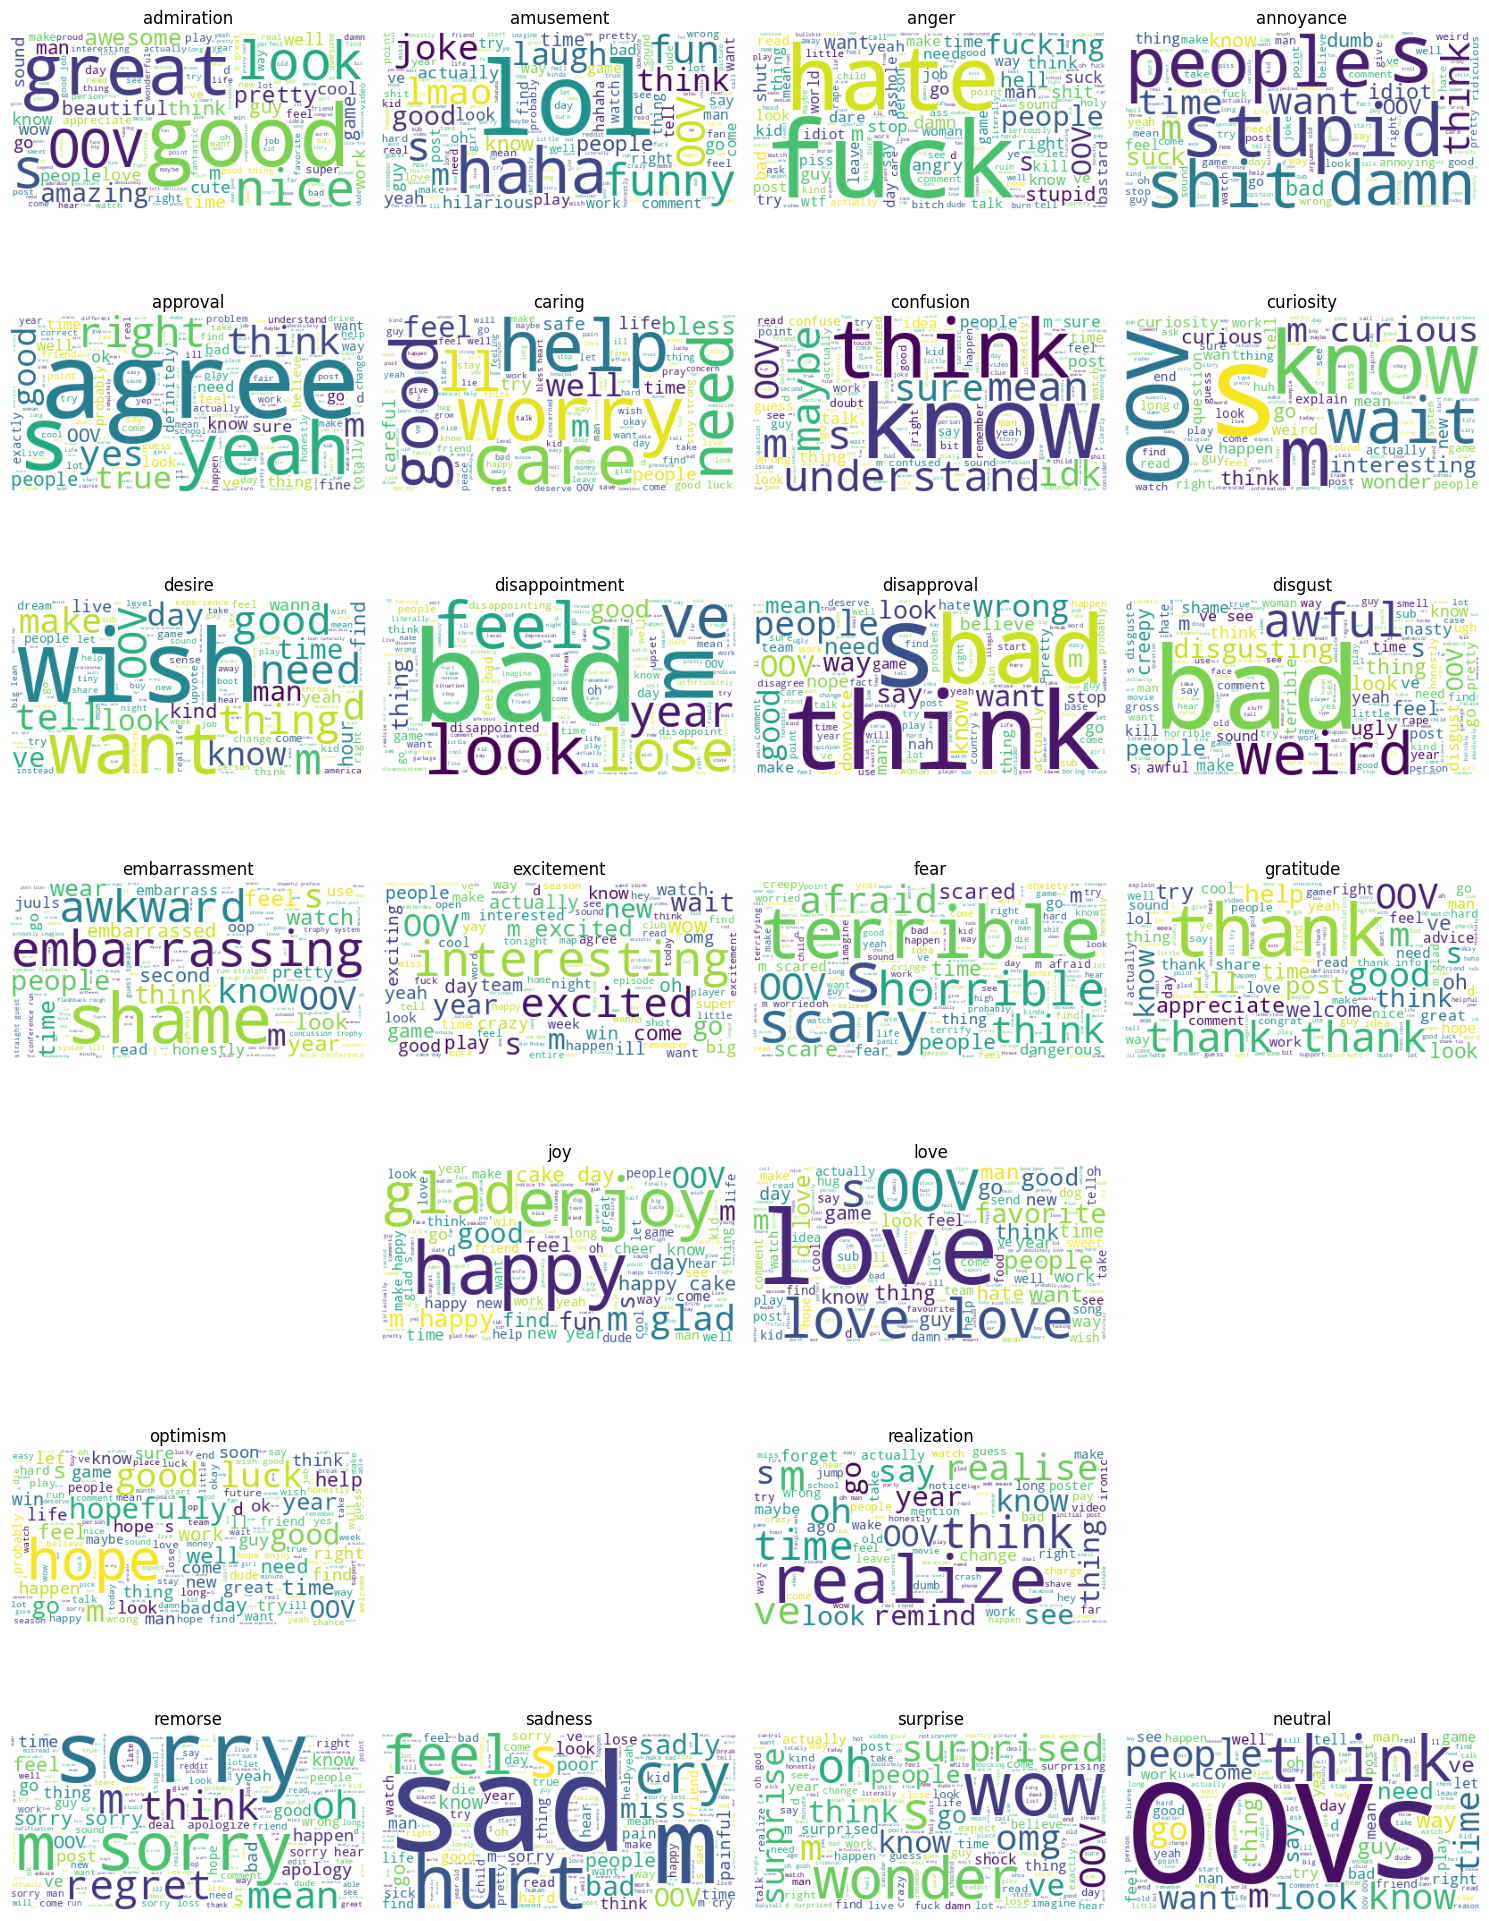

In [ ]:
from wordcloud import WordCloud

for i, emotion in enumerate(emotion_columns):
    idxs = np.where(y_val_pred == i)[0]
    words = []

    for idx in idxs:
        words.extend(X_val_seq[idx])

    words = [index_to_word.get(w, "") for w in words if w != 0]
    text = " ".join(words)

    if len(text) == 0:
        continue

    wc = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Word Cloud – {emotion}")
    plt.show()
